# Comparing Morning and Afternoon GPAs at UW Madison since 2006

This notebook performs a SQL query on the UW Madison database and does a hypothesis test comparing morning and afternoon class GPAs.

H0 = There is no difference between GPAs of morning and afternoon classes.

HA = There is a difference between GPAs of morning and afternoon classes.

---

## Import necessary Python libraries and modules

In [1]:
from sqlalchemy import create_engine
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from bootstrap import bootstrap

## Query the database and create dataframes of morning and afternoon classes

In [2]:
engine = create_engine('postgresql:///uw_madison')

In [3]:
morning_df = pd.read_sql('SELECT * FROM morning_classes_gpas;', engine)
morning_df.describe()

,section_number,section_gpa,non_gpa_count,non_gpa_percent
count,133761.000000,133761.000000,133761.000000,133761.0
mean,7.758981,3.421412,0.682665,0.0
std,14.373496,0.389728,2.493624,0.0
min,1.000000,0.000000,0.000000,0.0
25%,1.000000,3.144161,0.000000,0.0
50%,2.000000,3.441176,0.000000,0.0
75%,8.000000,3.748634,1.000000,0.0
max,234.000000,4.000000,163.000000,0.0


In [4]:
afternoon_df = pd.read_sql('SELECT * FROM afternoon_classes_gpas;', engine)
afternoon_df.describe()

,section_number,section_gpa,non_gpa_count,non_gpa_percent
count,185256.000000,185256.000000,185256.000000,185256.0
mean,7.302101,3.451737,0.656805,0.0
std,12.653836,0.397448,2.350974,0.0
min,1.000000,0.000000,0.000000,0.0
25%,1.000000,3.157895,0.000000,0.0
50%,2.000000,3.478533,0.000000,0.0
75%,8.000000,3.800000,1.000000,0.0
max,296.000000,4.000000,163.000000,0.0


## Remove the classes where the average GPA was 4.0 and only look at GPAs

In [5]:
morning_minus_four_os = morning_df.loc[morning_df['section_gpa'] != 4.0]['section_gpa']
morning_minus_four_os.describe()

count    123451.000000
mean          3.373092
std           0.366443
min           0.000000
25%           3.117647
50%           3.395833
75%           3.666667
max           3.996503
Name: section_gpa, dtype: float64

In [6]:
afternoon_minus_four_os = afternoon_df.loc[afternoon_df['section_gpa'] != 4.0]['section_gpa']
afternoon_minus_four_os.describe()

count    166296.000000
mean          3.389228
std           0.371208
min           0.000000
25%           3.121739
50%           3.416667
75%           3.695652
max           3.998418
Name: section_gpa, dtype: float64

## Choose 2,000 random classes from each population to do the hypothesis testing on

In [7]:
morning_choice = np.random.choice(morning_minus_four_os, size=2000, replace=False)
afternoon_choice = np.random.choice(afternoon_minus_four_os, size=2000, replace=False)

## Generate histogram plots for GPAs

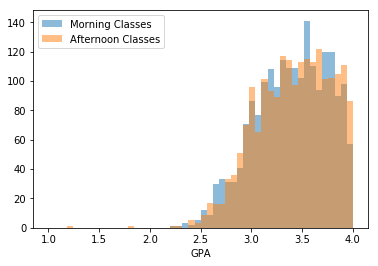

In [8]:
fig, ax = plt.subplots()
ax.hist(morning_choice, alpha=0.5, bins=50, range=(1.0, 4.0), label='Morning Classes')
ax.hist(afternoon_choice, alpha=0.5, bins=50, range=(1.0, 4.0), label='Afternoon Classes')
ax.legend()
ax.set_xlabel('GPA');

## Perform statistical testing for the hypothesis

In [9]:
stats.ttest_ind(morning_choice, afternoon_choice)

Ttest_indResult(statistic=-1.4595404861243038, pvalue=0.1444949710984318)

This shows that there is not a statistically significant difference between the morning and afternoon class GPAs.

Thus, we fail to reject the null hypothesis that grades are the same between the morning and afternoon.